In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [9]:
df = pd.read_csv('housing.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [21]:
class KMeans:
    def __init__(self, n_clusters=2, max_iter=300, tol=1e-4):
        self.n_clusters = n_clusters  # Number of clusters
        self.max_iter = max_iter  # Maximum number of iterations
        self.tol = tol  # Tolerance to declare convergence
        self.centroids = None  # Centroids of clusters
        self.labels = None  # Labels for each data point

    def fit(self, X):
        # Randomly initialize centroids
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        for i in range(self.max_iter):
            # Step 2: Assign each point to the nearest centroid
            self.labels = self._assign_clusters(X)

            # Step 3: Update centroids by calculating the mean of points in each cluster
            new_centroids = self._update_centroids(X)

            # Step 4: Check for convergence (if centroids don't change much)
            centroid_shift = np.linalg.norm(new_centroids - self.centroids)
            if centroid_shift < self.tol:
                print(f"Converged after {i+1} iterations")
                break

            self.centroids = new_centroids

    def _assign_clusters(self, X):
        """Assign each data point to the nearest centroid"""
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X):
        """Recalculate the centroids as the mean of points in each cluster"""
        new_centroids = np.array([X[self.labels == i].mean(axis=0) for i in range(self.n_clusters)])
        return new_centroids

    def predict(self, X):
        """Predict the closest cluster for each data point"""
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)



Converged after 76 iterations


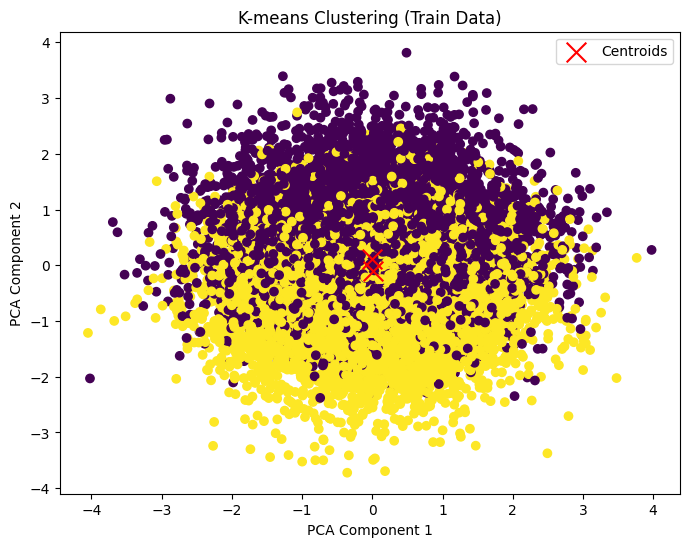

Silhouette Score: 0.08024193033662108
Silhouette Score (Test Set): 0.07857169897494239


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Step 1: Split the dataset into train and test
X, y = make_regression(n_samples=20639, n_features=8, noise=0.1, random_state=42)
df = pd.DataFrame(X, columns=['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'housing_median_age', 'feature_7', 'feature_8'])
df['median_house_value'] = y

# Splitting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['median_house_value']), df['median_house_value'], test_size=0.2, random_state=42)

# Step 2: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Apply K-means clustering on the training data
kmeans = KMeans()
kmeans.fit(X_train_scaled)

# Step 4: Visualize the clustering results using PCA for dimensionality reduction
# Apply PCA to reduce the data to 2D for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Visualizing the training set clusters
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=kmeans.labels, cmap='viridis', marker='o')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering (Train Data)')
plt.legend()
plt.show()

# Step 5: Evaluate the clustering performance using Silhouette Score
sil_score = silhouette_score(X_train_scaled, kmeans.labels)
print(f"Silhouette Score: {sil_score}")

# Step 6: Predict clusters on the test set
test_labels = kmeans.predict(X_test_scaled)

# Step 7: Evaluate the clustering performance on the test set using Silhouette Score
sil_score_test = silhouette_score(X_test_scaled, test_labels)
print(f"Silhouette Score (Test Set): {sil_score_test}")


In [23]:
#for classification problem


In [25]:
df = pd.read_csv('diabetes.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [26]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Step 1: Create a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=3, random_state=42)

# Step 2: Standardize the data (important for K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply K-means clustering (treating this as an unsupervised learning step)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Step 4: Assign the cluster labels as pseudo-class labels
pseudo_labels = kmeans.labels_

# Step 5: Train a classifier using the pseudo-labels (here, we use Random Forest)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, pseudo_labels, test_size=0.3, random_state=42)

# Train Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 6: Evaluate the classifier on the test set
y_pred = clf.predict(X_test)

# Step 7: Print classification report to see the accuracy
print(classification_report(y_test, y_pred))

# Step 8: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Optional: Plot the decision boundaries of the Random Forest classifier
import seaborn as sns
sns.set(style="white", palette="muted")

# Reduce dimensionality to 2D using PCA for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the decision boundaries
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', edgecolors='k', s=50)
plt.title('Random Forest Classifier Decision Boundaries with K-means Pseudo-labels')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()


ValueError: n_classes(3) * n_clusters_per_class(2) must be smaller or equal 2**n_informative(2)=4